In [1]:
# Load modules

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import geopandas as gpd
import mapclassify
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# ML packages
import sklearn.metrics as metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
ih = pd.read_csv("../data/final project/CLEAN_DATA/joined_data/ih_all.csv")
ih = ih.iloc[:, 1:]

nyc = pd.read_csv("../data/final project/CLEAN_DATA/joined_data/nyc.csv")
chicago = pd.read_csv("../data/final project/CLEAN_DATA/joined_data/chicago.csv")
sf = pd.read_csv("../data/final project/CLEAN_DATA/joined_data/sf.csv")
boston = pd.read_csv("../data/final project/CLEAN_DATA/joined_data/boston.csv")
dc = pd.read_csv("../data/final project/CLEAN_DATA/joined_data/dc.csv")

In [3]:
ih.head()

,zip,aff_units,aff_dev_rate,ih_prop,rental_all,rental_2014plus,med_hh_inc,pop,med_age,youth_pop,...,simpson,citizen_pop,housing_total,tot_dev_rate,dev_residual,resid_bin,aff_dev_bin,aff_unit_bin,ih_prop_bin,city
0,10001.0,1362.0,0.056475,0.007883,9712.0,1229.0,122776.0,24117.0,36.0,2101.0,...,0.623194,18676.0,14746.0,0.050960,0.005515,0.0,1.0,1.0,1.0,nyc
1,10002.0,876.0,0.011762,0.003167,28933.0,92.0,40045.0,74479.0,44.0,9477.0,...,0.763648,53646.0,35921.0,0.001235,0.010526,0.0,0.0,1.0,0.0,nyc
2,10003.0,0.0,0.000000,0.000000,17598.0,98.0,183787.0,53977.0,32.0,3374.0,...,0.488300,44096.0,30931.0,0.001816,-0.001816,0.0,0.0,0.0,0.0,nyc
3,10004.0,0.0,0.000000,0.000000,1104.0,0.0,205202.0,3335.0,37.0,382.0,...,0.564544,2537.0,2264.0,0.000000,0.000000,0.0,0.0,0.0,0.0,nyc
4,10005.0,0.0,0.000000,0.000000,3444.0,4.0,241094.0,8701.0,30.0,1037.0,...,0.468530,6542.0,5889.0,0.000460,-0.000460,0.0,0.0,0.0,0.0,nyc


### IH Development Rate

In [46]:
X = ih.iloc[:,6:-7]
X = X.drop("pop", axis = 1)
y = ih["aff_dev_rate"]

X.head()

,med_hh_inc,med_age,youth_pop,elderly_pop,white_pop,black_pop,asian_pop,pacisl_pop,other_race_pop,multiracial_pop,latinx_pop,simpson,citizen_pop,housing_total
0,122776.0,36.0,2101.0,3490.0,15677.0,1510.0,5377.0,21.0,799.0,717.0,3741.0,0.623194,18676.0,14746.0
1,40045.0,44.0,9477.0,16931.0,23849.0,6635.0,31198.0,22.0,8924.0,3127.0,19554.0,0.763648,53646.0,35921.0
2,183787.0,32.0,3374.0,7215.0,40681.0,3007.0,7812.0,73.0,1155.0,1168.0,4559.0,0.488300,44096.0,30931.0
3,205202.0,37.0,382.0,201.0,2033.0,142.0,992.0,17.0,35.0,116.0,108.0,0.564544,2537.0,2264.0
4,241094.0,30.0,1037.0,93.0,6532.0,94.0,1543.0,0.0,217.0,315.0,552.0,0.468530,6542.0,5889.0


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

parameters = {'n_estimators':range(64, 129)}
rforest = RandomForestRegressor(random_state=0,criterion='mse')
optim = GridSearchCV(rforest, parameters)
optim.get_params()["estimator__n_estimators"]
print("Number of trees =", optim.get_params()["estimator__n_estimators"])
clf = RandomForestRegressor(n_estimators= optim.get_params()["estimator__n_estimators"])
clf.fit(X_train, y_train)
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

Train sample (X): 284
Train sample (y): 284
Test sample (X): 95
Test sample (y): 95
Number of trees = 100
0.8645702653266586
0.10443055326861517


Text(0, 0.5, 'Feature')

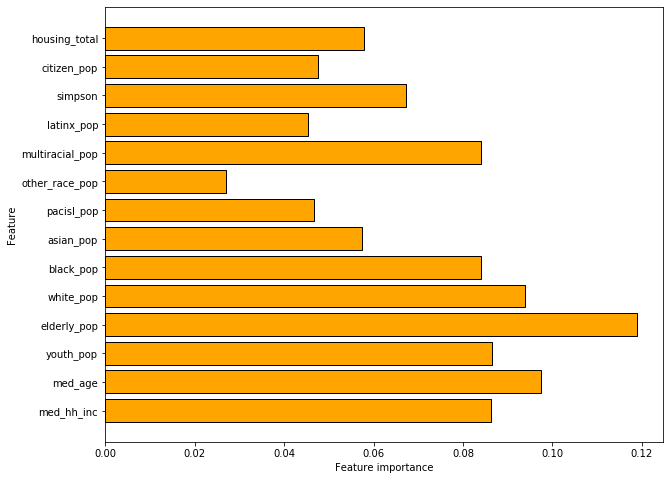

In [50]:
n_features = X.shape[1]
plt.figure(figsize=(10,8))
plt.barh(range(n_features), clf.feature_importances_, align='center', color='orange', edgecolor='k')
plt.yticks(np.arange(n_features), X.columns.tolist())
plt.xlabel("Feature importance")
plt.ylabel("Feature")

#### Individual Cities

In [7]:
sf.iloc[:,0:-1] = sf.iloc[:,0:-1].fillna(0).astype(np.float32)
dc.iloc[:,0:-1] = dc.iloc[:,0:-1].fillna(0).astype(np.float32)
nyc.iloc[:,0:-1] = nyc.iloc[:,0:-1].fillna(0).astype(np.float32)
chicago.iloc[:,0:-1] = chicago.iloc[:,0:-1].fillna(0).astype(np.float32)
boston.iloc[:,0:-1] = boston.iloc[:,0:-1].fillna(0).astype(np.float32)

In [8]:
X = dc.iloc[:,7:-7]
X = X.drop("pop", axis = 1)
y = dc["aff_dev_rate"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

parameters = {'n_estimators':range(64, 129)}
rforest = RandomForestRegressor(random_state=0,criterion='mse')
optim = GridSearchCV(rforest, parameters)
optim.get_params()["estimator__n_estimators"]
print("Number of trees =", optim.get_params()["estimator__n_estimators"])
clf = RandomForestRegressor(n_estimators= optim.get_params()["estimator__n_estimators"])
clf.fit(X_train, y_train)
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

Train sample (X): 39
Train sample (y): 39
Test sample (X): 14
Test sample (y): 14
Number of trees = 100
0.9273509939019907
0.6027398646098674


In [9]:
X = boston.iloc[:,7:-7]
X = X.drop("pop", axis = 1)
y = boston["aff_dev_rate"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

parameters = {'n_estimators':range(64, 129)}
rforest = RandomForestRegressor(random_state=0,criterion='mse')
optim = GridSearchCV(rforest, parameters)
optim.get_params()["estimator__n_estimators"]
print("Number of trees =", optim.get_params()["estimator__n_estimators"])
clf = RandomForestRegressor(n_estimators= optim.get_params()["estimator__n_estimators"])
clf.fit(X_train, y_train)
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

Train sample (X): 32
Train sample (y): 32
Test sample (X): 11
Test sample (y): 11
Number of trees = 100
0.8650566112487466
-0.23553136584069947


In [10]:
X = chicago.iloc[:,7:-7]
X = X.drop("pop", axis = 1)
y = chicago["aff_dev_rate"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

parameters = {'n_estimators':range(64, 129)}
rforest = RandomForestRegressor(random_state=0,criterion='mse')
optim = GridSearchCV(rforest, parameters)
optim.get_params()["estimator__n_estimators"]
print("Number of trees =", optim.get_params()["estimator__n_estimators"])
clf = RandomForestRegressor(n_estimators= optim.get_params()["estimator__n_estimators"])
clf.fit(X_train, y_train)
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

Train sample (X): 45
Train sample (y): 45
Test sample (X): 15
Test sample (y): 15
Number of trees = 100
0.8430035348875939
-0.0707478932090031


In [11]:
X = sf.iloc[:,7:-7]
X = X.drop("pop", axis = 1)
y = sf["aff_dev_rate"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

parameters = {'n_estimators':range(64, 129)}
rforest = RandomForestRegressor(random_state=0,criterion='mse')
optim = GridSearchCV(rforest, parameters)
optim.get_params()["estimator__n_estimators"]
print("Number of trees =", optim.get_params()["estimator__n_estimators"])
clf = RandomForestRegressor(n_estimators= optim.get_params()["estimator__n_estimators"])
clf.fit(X_train, y_train)
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

Train sample (X): 34
Train sample (y): 34
Test sample (X): 12
Test sample (y): 12
Number of trees = 100
0.4468574384272451
-1.3777848762209324


In [12]:
X = nyc.iloc[:,7:-7]
X = X.drop("pop", axis = 1)
y = nyc["aff_dev_rate"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

parameters = {'n_estimators':range(64, 129)}
rforest = RandomForestRegressor(random_state=0,criterion='mse')
optim = GridSearchCV(rforest, parameters)
optim.get_params()["estimator__n_estimators"]
print("Number of trees =", optim.get_params()["estimator__n_estimators"])
clf = RandomForestRegressor(n_estimators= optim.get_params()["estimator__n_estimators"])
clf.fit(X_train, y_train)
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

Train sample (X): 132
Train sample (y): 132
Test sample (X): 45
Test sample (y): 45
Number of trees = 100
0.8551925405877637
-0.02388399514611783


## Residual Development

In [34]:
X = ih.iloc[:,6:-7]
X = X.drop("pop", axis = 1)
y = ih["dev_residual"]

X.head()

,med_hh_inc,med_age,youth_pop,elderly_pop,white_pop,black_pop,asian_pop,pacisl_pop,other_race_pop,multiracial_pop,latinx_pop,simpson,citizen_pop,housing_total
0,122776.0,36.0,2101.0,3490.0,15677.0,1510.0,5377.0,21.0,799.0,717.0,3741.0,0.623194,18676.0,14746.0
1,40045.0,44.0,9477.0,16931.0,23849.0,6635.0,31198.0,22.0,8924.0,3127.0,19554.0,0.763648,53646.0,35921.0
2,183787.0,32.0,3374.0,7215.0,40681.0,3007.0,7812.0,73.0,1155.0,1168.0,4559.0,0.488300,44096.0,30931.0
3,205202.0,37.0,382.0,201.0,2033.0,142.0,992.0,17.0,35.0,116.0,108.0,0.564544,2537.0,2264.0
4,241094.0,30.0,1037.0,93.0,6532.0,94.0,1543.0,0.0,217.0,315.0,552.0,0.468530,6542.0,5889.0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

parameters = {'n_estimators':range(64, 129)}
rforest = RandomForestRegressor(random_state=0,criterion='mse')
optim = GridSearchCV(rforest, parameters)
optim.get_params()["estimator__n_estimators"]
print("Number of trees =", optim.get_params()["estimator__n_estimators"])
clf = RandomForestRegressor(n_estimators= optim.get_params()["estimator__n_estimators"])
clf.fit(X_train, y_train)
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

Train sample (X): 284
Train sample (y): 284
Test sample (X): 95
Test sample (y): 95
Number of trees = 100
0.8657054957909682
0.14834589697257672


Text(0, 0.5, 'Feature')

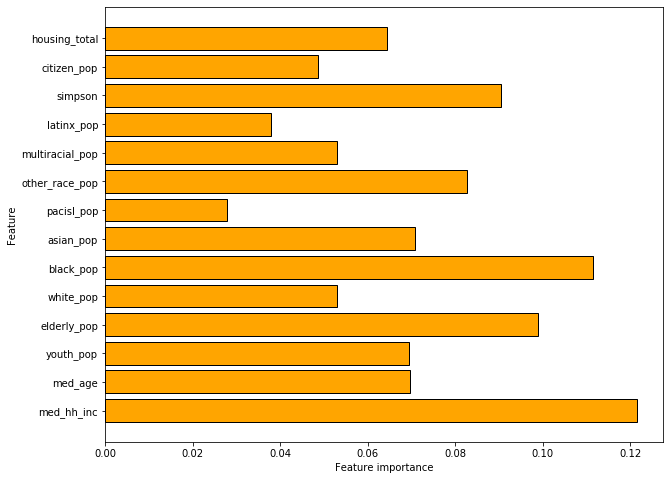

In [45]:
n_features = X.shape[1]
plt.figure(figsize=(10,8))
plt.barh(range(n_features), clf.feature_importances_, align='center', color='orange', edgecolor='k')
plt.yticks(np.arange(n_features), X.columns.tolist())
plt.xlabel("Feature importance")
plt.ylabel("Feature")

#### Individual Cities

In [16]:
X = nyc.iloc[:,7:-7]
X = X.drop("pop", axis = 1)
y = nyc["dev_residual"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

parameters = {'n_estimators':range(64, 129)}
rforest = RandomForestRegressor(random_state=0,criterion='mse')
optim = GridSearchCV(rforest, parameters)
optim.get_params()["estimator__n_estimators"]
print("Number of trees =", optim.get_params()["estimator__n_estimators"])
clf = RandomForestRegressor(n_estimators= optim.get_params()["estimator__n_estimators"])
clf.fit(X_train, y_train)
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

Train sample (X): 132
Train sample (y): 132
Test sample (X): 45
Test sample (y): 45
Number of trees = 100
0.8281505353559782
-0.2263816829539624


In [17]:
X = dc.iloc[:,7:-7]
X = X.drop("pop", axis = 1)
y = dc["aff_dev_rate"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

parameters = {'n_estimators':range(64, 129)}
rforest = RandomForestRegressor(random_state=0,criterion='mse')
optim = GridSearchCV(rforest, parameters)
optim.get_params()["estimator__n_estimators"]
print("Number of trees =", optim.get_params()["estimator__n_estimators"])
clf = RandomForestRegressor(n_estimators= optim.get_params()["estimator__n_estimators"])
clf.fit(X_train, y_train)
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

Train sample (X): 39
Train sample (y): 39
Test sample (X): 14
Test sample (y): 14
Number of trees = 100
0.9117172901308597
0.4502267147864255


In [18]:
X = chicago.iloc[:,7:-7]
X = X.drop("pop", axis = 1)
y = chicago["aff_dev_rate"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

parameters = {'n_estimators':range(64, 129)}
rforest = RandomForestRegressor(random_state=0,criterion='mse')
optim = GridSearchCV(rforest, parameters)
optim.get_params()["estimator__n_estimators"]
print("Number of trees =", optim.get_params()["estimator__n_estimators"])
clf = RandomForestRegressor(n_estimators= optim.get_params()["estimator__n_estimators"])
clf.fit(X_train, y_train)
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

Train sample (X): 45
Train sample (y): 45
Test sample (X): 15
Test sample (y): 15
Number of trees = 100
0.7898812275977065
-0.08207564774812015


In [19]:
X = sf.iloc[:,7:-7]
X = X.drop("pop", axis = 1)
y = sf["aff_dev_rate"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

parameters = {'n_estimators':range(64, 129)}
rforest = RandomForestRegressor(random_state=0,criterion='mse')
optim = GridSearchCV(rforest, parameters)
optim.get_params()["estimator__n_estimators"]
print("Number of trees =", optim.get_params()["estimator__n_estimators"])
clf = RandomForestRegressor(n_estimators= optim.get_params()["estimator__n_estimators"])
clf.fit(X_train, y_train)
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

Train sample (X): 34
Train sample (y): 34
Test sample (X): 12
Test sample (y): 12
Number of trees = 100
0.5408480060853311
-0.2619316297453398


In [20]:
X = boston.iloc[:,7:-7]
X = X.drop("pop", axis = 1)
y = boston["aff_dev_rate"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

parameters = {'n_estimators':range(64, 129)}
rforest = RandomForestRegressor(random_state=0,criterion='mse')
optim = GridSearchCV(rforest, parameters)
optim.get_params()["estimator__n_estimators"]
print("Number of trees =", optim.get_params()["estimator__n_estimators"])
clf = RandomForestRegressor(n_estimators= optim.get_params()["estimator__n_estimators"])
clf.fit(X_train, y_train)
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

Train sample (X): 32
Train sample (y): 32
Test sample (X): 11
Test sample (y): 11
Number of trees = 100
0.8815182147872125
0.17510807042680132


### IH Allocation

In [51]:
X = ih.iloc[:,6:-7]
X = X.drop("pop", axis = 1)
y = ih["ih_prop"]

X.head()

,med_hh_inc,med_age,youth_pop,elderly_pop,white_pop,black_pop,asian_pop,pacisl_pop,other_race_pop,multiracial_pop,latinx_pop,simpson,citizen_pop,housing_total
0,122776.0,36.0,2101.0,3490.0,15677.0,1510.0,5377.0,21.0,799.0,717.0,3741.0,0.623194,18676.0,14746.0
1,40045.0,44.0,9477.0,16931.0,23849.0,6635.0,31198.0,22.0,8924.0,3127.0,19554.0,0.763648,53646.0,35921.0
2,183787.0,32.0,3374.0,7215.0,40681.0,3007.0,7812.0,73.0,1155.0,1168.0,4559.0,0.488300,44096.0,30931.0
3,205202.0,37.0,382.0,201.0,2033.0,142.0,992.0,17.0,35.0,116.0,108.0,0.564544,2537.0,2264.0
4,241094.0,30.0,1037.0,93.0,6532.0,94.0,1543.0,0.0,217.0,315.0,552.0,0.468530,6542.0,5889.0


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

parameters = {'n_estimators':range(64, 129)}
rforest = RandomForestRegressor(random_state=0,criterion='mse')
optim = GridSearchCV(rforest, parameters)
optim.get_params()["estimator__n_estimators"]
print("Number of trees =", optim.get_params()["estimator__n_estimators"])
clf = RandomForestRegressor(n_estimators= optim.get_params()["estimator__n_estimators"])
clf.fit(X_train, y_train)
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

Train sample (X): 284
Train sample (y): 284
Test sample (X): 95
Test sample (y): 95
Number of trees = 100
0.7484054260797568
0.12472836034380952


Text(0, 0.5, 'Feature')

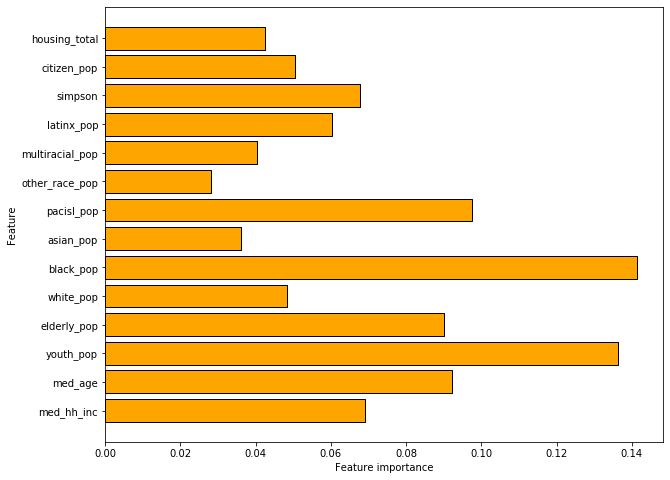

In [54]:
n_features = X.shape[1]
plt.figure(figsize=(10,8))
plt.barh(range(n_features), clf.feature_importances_, align='center', color='orange', edgecolor='k')
plt.yticks(np.arange(n_features), X.columns.tolist())
plt.xlabel("Feature importance")
plt.ylabel("Feature")

#### Individual Cities

In [24]:
X = nyc.iloc[:,7:-7]
X = X.drop("pop", axis = 1)
y = nyc["ih_prop"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

parameters = {'n_estimators':range(64, 129)}
rforest = RandomForestRegressor(random_state=0,criterion='mse')
optim = GridSearchCV(rforest, parameters)
optim.get_params()["estimator__n_estimators"]
print("Number of trees =", optim.get_params()["estimator__n_estimators"])
clf = RandomForestRegressor(n_estimators= optim.get_params()["estimator__n_estimators"])
clf.fit(X_train, y_train)
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

Train sample (X): 132
Train sample (y): 132
Test sample (X): 45
Test sample (y): 45
Number of trees = 100
0.8413092143290073
-0.5073702133570532


In [25]:
X = dc.iloc[:,7:-7]
X = X.drop("pop", axis = 1)
y = dc["ih_prop"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

parameters = {'n_estimators':range(64, 129)}
rforest = RandomForestRegressor(random_state=0,criterion='mse')
optim = GridSearchCV(rforest, parameters)
optim.get_params()["estimator__n_estimators"]
print("Number of trees =", optim.get_params()["estimator__n_estimators"])
clf = RandomForestRegressor(n_estimators= optim.get_params()["estimator__n_estimators"])
clf.fit(X_train, y_train)
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

Train sample (X): 39
Train sample (y): 39
Test sample (X): 14
Test sample (y): 14
Number of trees = 100
0.941065298815036
0.6638488602211607


In [26]:
X = chicago.iloc[:,7:-7]
X = X.drop("pop", axis = 1)
y = chicago["ih_prop"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

parameters = {'n_estimators':range(64, 129)}
rforest = RandomForestRegressor(random_state=0,criterion='mse')
optim = GridSearchCV(rforest, parameters)
optim.get_params()["estimator__n_estimators"]
print("Number of trees =", optim.get_params()["estimator__n_estimators"])
clf = RandomForestRegressor(n_estimators= optim.get_params()["estimator__n_estimators"])
clf.fit(X_train, y_train)
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

Train sample (X): 45
Train sample (y): 45
Test sample (X): 15
Test sample (y): 15
Number of trees = 100
0.8679412728569624
-0.026453468614615394


In [27]:
X = sf.iloc[:,7:-7]
X = X.drop("pop", axis = 1)
y = sf["ih_prop"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

parameters = {'n_estimators':range(64, 129)}
rforest = RandomForestRegressor(random_state=0,criterion='mse')
optim = GridSearchCV(rforest, parameters)
optim.get_params()["estimator__n_estimators"]
print("Number of trees =", optim.get_params()["estimator__n_estimators"])
clf = RandomForestRegressor(n_estimators= optim.get_params()["estimator__n_estimators"])
clf.fit(X_train, y_train)
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

Train sample (X): 34
Train sample (y): 34
Test sample (X): 12
Test sample (y): 12
Number of trees = 100
0.41945963833550115
-0.10388409732774706


In [28]:
X = boston.iloc[:,7:-7]
X = X.drop("pop", axis = 1)
y = boston["ih_prop"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

parameters = {'n_estimators':range(64, 129)}
rforest = RandomForestRegressor(random_state=0,criterion='mse')
optim = GridSearchCV(rforest, parameters)
optim.get_params()["estimator__n_estimators"]
print("Number of trees =", optim.get_params()["estimator__n_estimators"])
clf = RandomForestRegressor(n_estimators= optim.get_params()["estimator__n_estimators"])
clf.fit(X_train, y_train)
print (clf.score(X_train, y_train))
print (clf.score(X_test, y_test))

Train sample (X): 32
Train sample (y): 32
Test sample (X): 11
Test sample (y): 11
Number of trees = 100
0.9091654988449624
0.3442099407862263
